In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#read the data
df1=pd.read_csv('E:/Project/Python/Data files/AirPassengers.csv')
#check data types
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
#we are providing inputs to tell pandas that we are trying to work with time series
df1=pd.read_csv('E:/Project/Python/Data files/AirPassengers.csv',parse_dates=['Month'])
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
#It is recommended that we mmake our time series reference as the index
df1=pd.read_csv('E:/Project/Python/Data files/AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [7]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
#we can conveniently do slicing i.e. obtain data for a specific time period
df1['1951-04-01':'1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [9]:
#we can check values corresponding to a specific time point
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

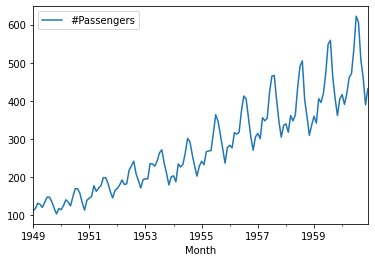

In [10]:
#plot time series
df1.plot()
plt.show()

In [13]:
pip install pylab

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


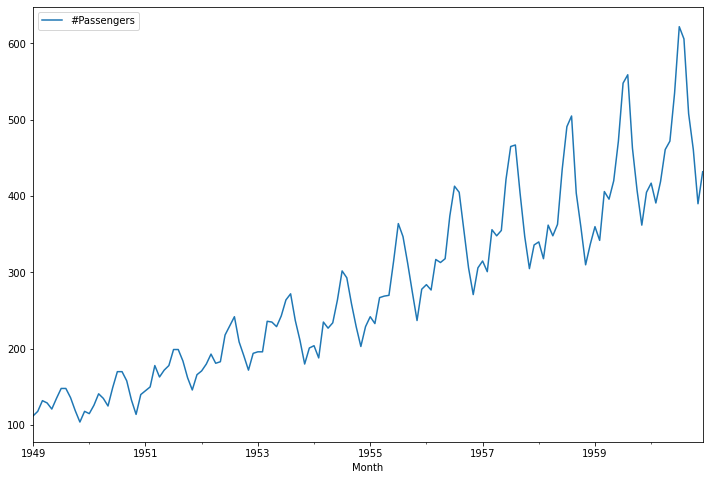

In [14]:
#increase the figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df1.plot()
plt.show()

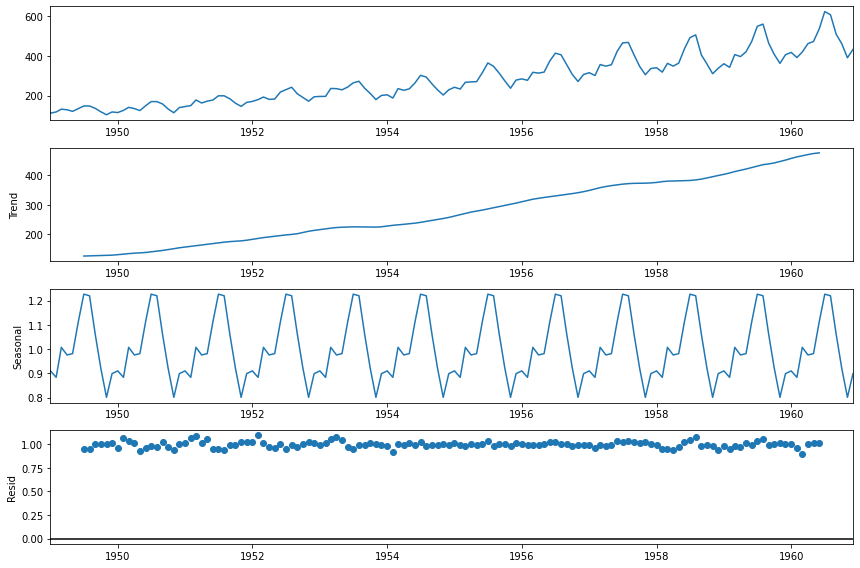

In [15]:
#Decompose the time series multiplicatively
df1_mul_dec=seasonal_decompose(df1,model='multiplicative')
df1_mul_dec.plot()
plt.show()

In [33]:
#let's try to do log transformation
df1_log=df1.copy()

In [34]:
df1_log['Pax']=np.log(df1)

In [35]:
df1_log.Pax

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

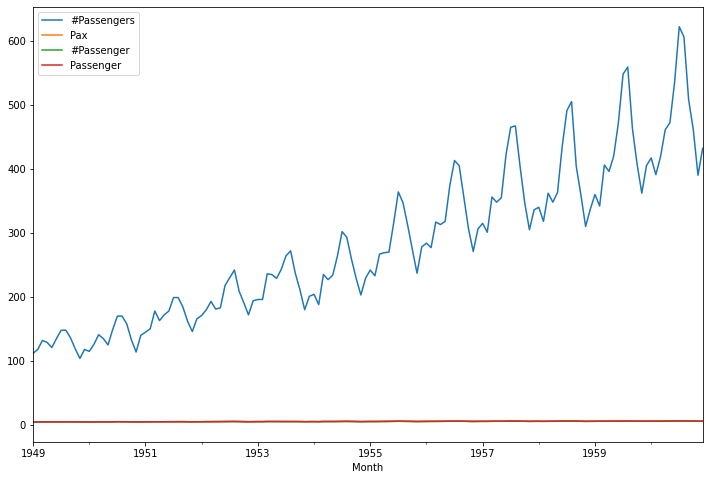

In [28]:
#visualize the log transfomed series
df1_log.plot()
plt.show()

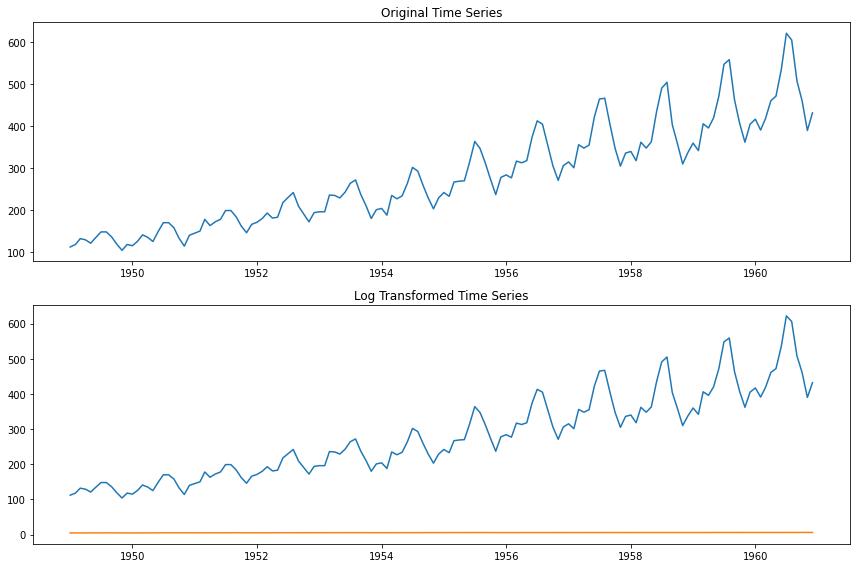

In [36]:
#compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)
plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()